k nearest neighbors:
  
The heart dataset (given) contains 303 patients  heart-disease diagnoses. Here are the first 5 patients data:

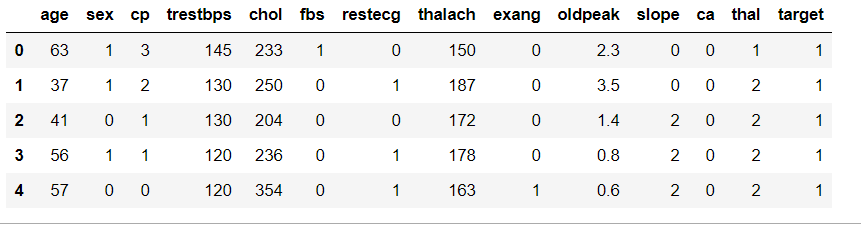

 - The leftmost col. is the ID.  
 
 - Columns 1-13 are some lab results.

 - The last column 'target' shows 1 for 'positive' or 0 for negative 

 - data in a numpy array (code is given)  
 
 
we need to use numpy to work on the k nearest neighbors (kNNs) algorithm.  


 ---- 

## Step 1. For one patient (use patient ID)
   
    
         - ask user to input a patient's id  (int : 0-302),

         - write a function to calculate the Euclidean distance (from this patient to all others)  

           **See the formula below, target col should be exclusive**
    
   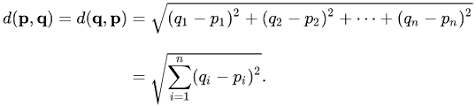
    
          where n is the number of test parameters (n=13).

         - find top 5 (k = 5)  most similar patients based on the shortest distances, and track their diagnoses,

         - use majority vote to predict this patient's diagnosis and compare it with this patient's actual diagnosis:
                 
                   1. if they match, there is no error
                   2. if they do not match, there is an error
         - print out both diagnoses.
         
 

In [1]:
# libraries needed
import pandas as pd 
import numpy as np
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from matplotlib import pyplot as plt

# load in the heart disease data into dataframe
data = pd.read_csv("/Users/bethlhem/Desktop/heart.csv")
#print(data.head())


# use numpy array 
heart = np.asarray(data)
heart = [arr[:len(arr)-1] for arr in heart]
#print(heart)

# Your code start here 

patient_ID = int(input("What is the patient's ID: "))

def predict_target(patient_ID):
    
    all_dist = []
    unmodified_data = []
    if patient_ID >= 303 or patient_ID < 0: #gives a range for valid input
        print ("Please enter a valid patient ID") 
    else:
        for i in range(len(heart)): #if valid ID calculates the euclidean distance and appends every value to dist[]
            dist = np.sqrt(np.sum(np.square(heart[patient_ID] - heart[i])))
            all_dist.append(dist)
            unmodified_data.append(dist)

    all_dist.sort() #sort all distances to get the shortest on the top 
    top_5 = all_dist[1:6]
    # print(top_5)

    #print(all_dist)

    target_count = 0
    for dist in top_5:  #calculate the majority target value 
        index = unmodified_data.index(dist)
        target = data.iloc[index][-1]
        if target>0:
            target_count += 1

    if target_count >= 3:
        return True
    else:
        return False
        

predicted_target = predict_target(patient_ID)
if predicted_target:
     print("Majority vote from 5 nearest neighbors:  positive.")
else:
    print("Majority vote from 5 nearest neighbors:  negative.")
patient_target = data.iloc[patient_ID][-1] # decide wether positive or negative for the given ID

if patient_target>0:
    print("Actually this patient is tested positive.")
else:
    print("Actually this patient is tested negative.")



What is the patient's ID: 100
Majority vote from 5 nearest neighbors:  positive.
Actually this patient is tested positive.



### sample run 1
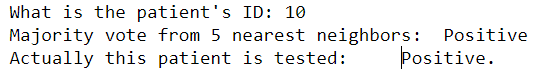

### sample run 2
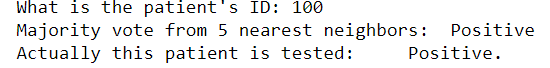

## sample run 3
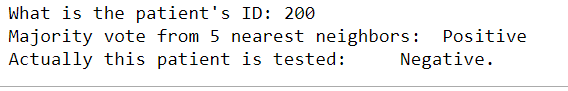

##  Step 2: Run over all patients and check the overall accuracy for k = 5
 
    Based on what you have in step 1, you need to run a loop to check every patient's prediction vs actual diagnosis. 
    Then find the accuracy (total number of correct predictions/total cases)


In [2]:
# overall accuracy

n = len(heart)

#def overall_accuracy():
    
count = 0
    
for i in range (n):
    target_prediction = predict_target(i)
    actual_target = data.iloc[i][-1]
    if (target_prediction==True and actual_target==1)or(target_prediction==False and actual_target==0) :
        count+=1
accuracy = count/n
    
print(accuracy)
#overall_accuracy()


        
        











# k: 5   accuracy: 0.6501650165016502

0.6534653465346535


## Step 3: Find the best k.
    
    For different K, this accuracy might not the same. Find the best K which corresponds the highest accuracy.


Text(0, 0.5, 'Accuracy')

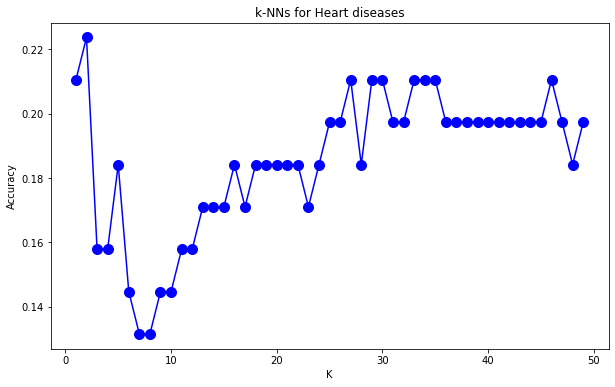

In [14]:
# loop for different k
#math.sqrt(len(heart))
X = data.iloc[:,:-1].values
y = data.iloc[:,13].values

X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


"""for i in range (0,50,10):
    
    classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean', p = 2)
    classifier = classifier.fit(X_train,y_train)
    #prediction
    y_pred = classifier.predict(X_test)
    #check accuracy
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print('Accuracy: {:.2f}'.format(accuracy))
"""
error_rate = []
accuracy = []
for i in range(1,50):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color= 'blue', marker='o',
 markerfacecolor='blue', markersize=10)
plt.title('k-NNs for Heart diseases')
plt.xlabel('K')
plt.ylabel('Accuracy')













In [ ]:
# end 